In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lego Dataset
### Let's start with Themes

In [2]:
df = pd.read_csv('lego_db/themes.csv')
df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
609,610,Brickheadz,NaN
610,611,Series 17 Minifigures,535.0
611,612,Star Wars Episode 8,158.0
612,613,Freemakers,158.0


In [3]:
# Fill parent NaN with own ID
df.parent_id.fillna(df.id, inplace=True)
df

,id,name,parent_id
0,1,Technic,1.0
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
609,610,Brickheadz,610.0
610,611,Series 17 Minifigures,535.0
611,612,Star Wars Episode 8,158.0
612,613,Freemakers,158.0


In [4]:
# Change parent_id to int
df['parent_id'] = df['parent_id'].apply(lambda x: int(x))
df.head()

,id,name,parent_id
0,1,Technic,1
1,2,Arctic Technic,1
2,3,Competition,1
3,4,Expert Builder,1
4,5,Model,1


In [5]:
df.pivot_table(index=['parent_id', 'name']).head()

id
parent_id name              
1         Arctic Technic   2
          Competition      3
          Expert Builder   4
          Model            5
          RoboRiders      16

In [6]:
len(df['parent_id'].unique())

139

In [7]:
df = df.set_index('id')
df


,name,parent_id
id,,
1,Technic,1
2,Arctic Technic,1
3,Competition,1
4,Expert Builder,1
5,Model,1
...,...,...
610,Brickheadz,610
611,Series 17 Minifigures,535
612,Star Wars Episode 8,158


In [8]:
def get_names():
    names = []
    for id in df['parent_id']:
        names.append(df.name[id])
    return names

# get_names()

In [9]:
# def get_name(x):
#     for x in df['parent_id']:
#         return df.name[x]

# df['collection'] = df.apply(lambda x: get_name(x))
df['collection'] = get_names()
df


,name,parent_id,collection
id,,,
1,Technic,1,Technic
2,Arctic Technic,1,Technic
3,Competition,1,Technic
4,Expert Builder,1,Technic
5,Model,1,Technic
...,...,...,...
610,Brickheadz,610,Brickheadz
611,Series 17 Minifigures,535,Collectible Minifigures
612,Star Wars Episode 8,158,Star Wars


In [10]:
len(df['collection'].unique())

# why this number change???

133

In [11]:
unique_df = df.groupby('collection')['name'].nunique()
unique_df.sort_values(ascending=False).to_frame().head(20)

,name
collection,
Bionicle,39
Collectible Minifigures,25
Educational and Dacta,21
Space,21
Town,20
Star Wars,20
Classic Town,18
Castle,18
City,15


In [12]:
df[df['collection'] == 'Town']

,name,parent_id,collection
id,,,
50,Town,50,Town
51,Arctic,50,Town
52,City,50,Town
67,Classic Town,50,Town
86,Divers,50,Town
87,Extreme Team,50,Town
88,Launch Command,50,Town
89,Outback,50,Town
90,Paradisa,50,Town


In [13]:
df.loc[290]

name               Town
parent_id           279
collection    4 Juniors
Name: 290, dtype: object

### Let's hop over to Sets

In [14]:
df_sets = pd.read_csv('lego_db/sets.csv')
df_sets.sample(5)

,set_num,name,year,theme_id,num_parts
202,10221-1,Super Star Destroyer,2011,174,3151
7482,71010-2,Zombie Pirate,2015,552,7
7272,70809-1,Lord Business’ Hideout,2014,578,736
5266,553-1,Straight Road Plates,1979,84,2
7998,75023-17,"Advent Calendar 2013, Star Wars (Day 16) - Geo...",2013,225,10


In [15]:
df_town = df_sets[df_sets['theme_id'] == 50]
df_town

,set_num,name,year,theme_id,num_parts
704,1246-1,Helicopter,1999,50,26
705,1247-1,Patrol Car,1999,50,32
707,1248-1,Fire Boat,1999,50,24
761,1294-1,Fire Helicopter,2000,50,31
763,1296-1,Land Scooper,2000,50,30
764,1297-1,Speed Patroller,2000,50,34
2351,3180-1,Tank Truck,2010,50,221
2474,3350-1,City #1,2000,50,27
2476,3351-1,Three Minifig Pack - City #2,2000,50,24
4583,4999-1,Vestas Windmill,2008,50,809


In [16]:
df_sets.groupby('year')['name'].nunique().to_frame()

,name
year,
1950,7
1953,4
1954,13
1955,27
1956,12
...,...
2013,591
2014,709
2015,657


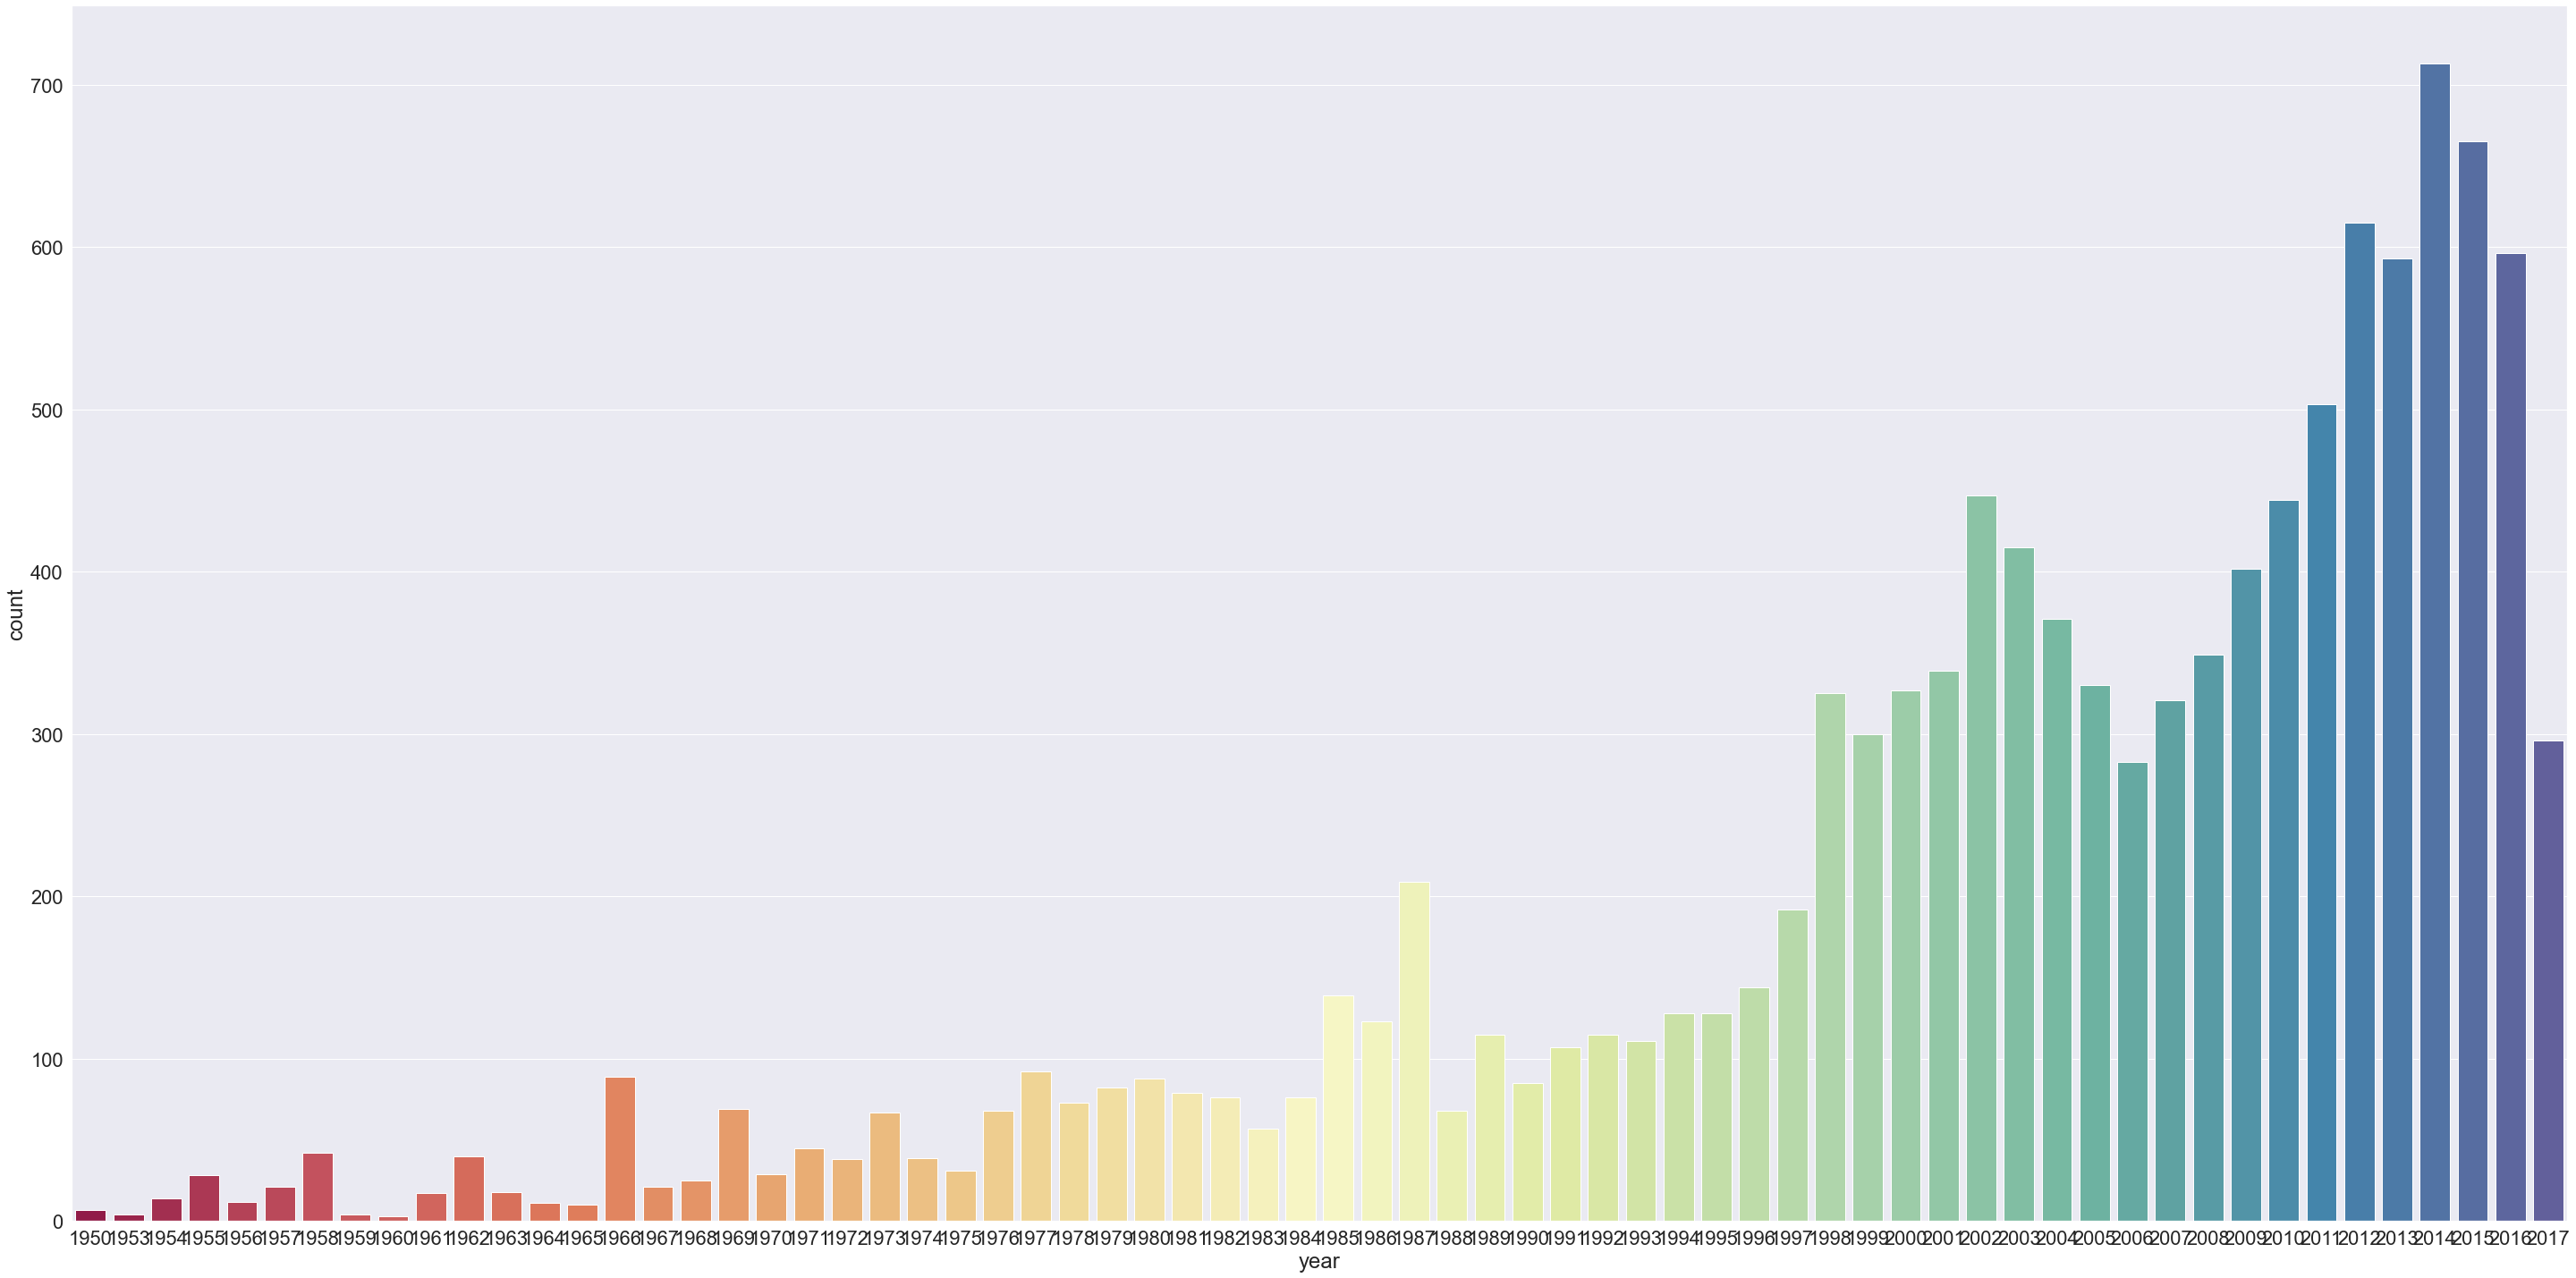

In [19]:
plt.rc("figure", figsize=(50, 25))
sns.set(font_scale=2)
sns.countplot(x='year', data=df_sets.sort_values(by='year', ascending=False), palette='Spectral')

In [39]:
# df_sets.sort_values(by='year', ascending=False).describe()
df_last_10_yrs = df_sets[(df_sets['year'] >= 1997) & (df_sets['year'] <= 2017)]
df_last_10_yrs

,set_num,name,year,theme_id,num_parts
18,03093-1,The Race to Build It Board Game,1999,502,70
25,10000-1,Guarded Inn,2001,186,256
26,10001-1,Metroliner,2001,233,785
27,10002-1,Railroad Club Car,2001,233,272
28,10003-1,1 x 2 Sand Red Bricks,2001,254,100
...,...,...,...,...,...
11667,Watford-1,"LEGO Store Grand Opening Exclusive Set, Watfor...",2013,408,15
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146


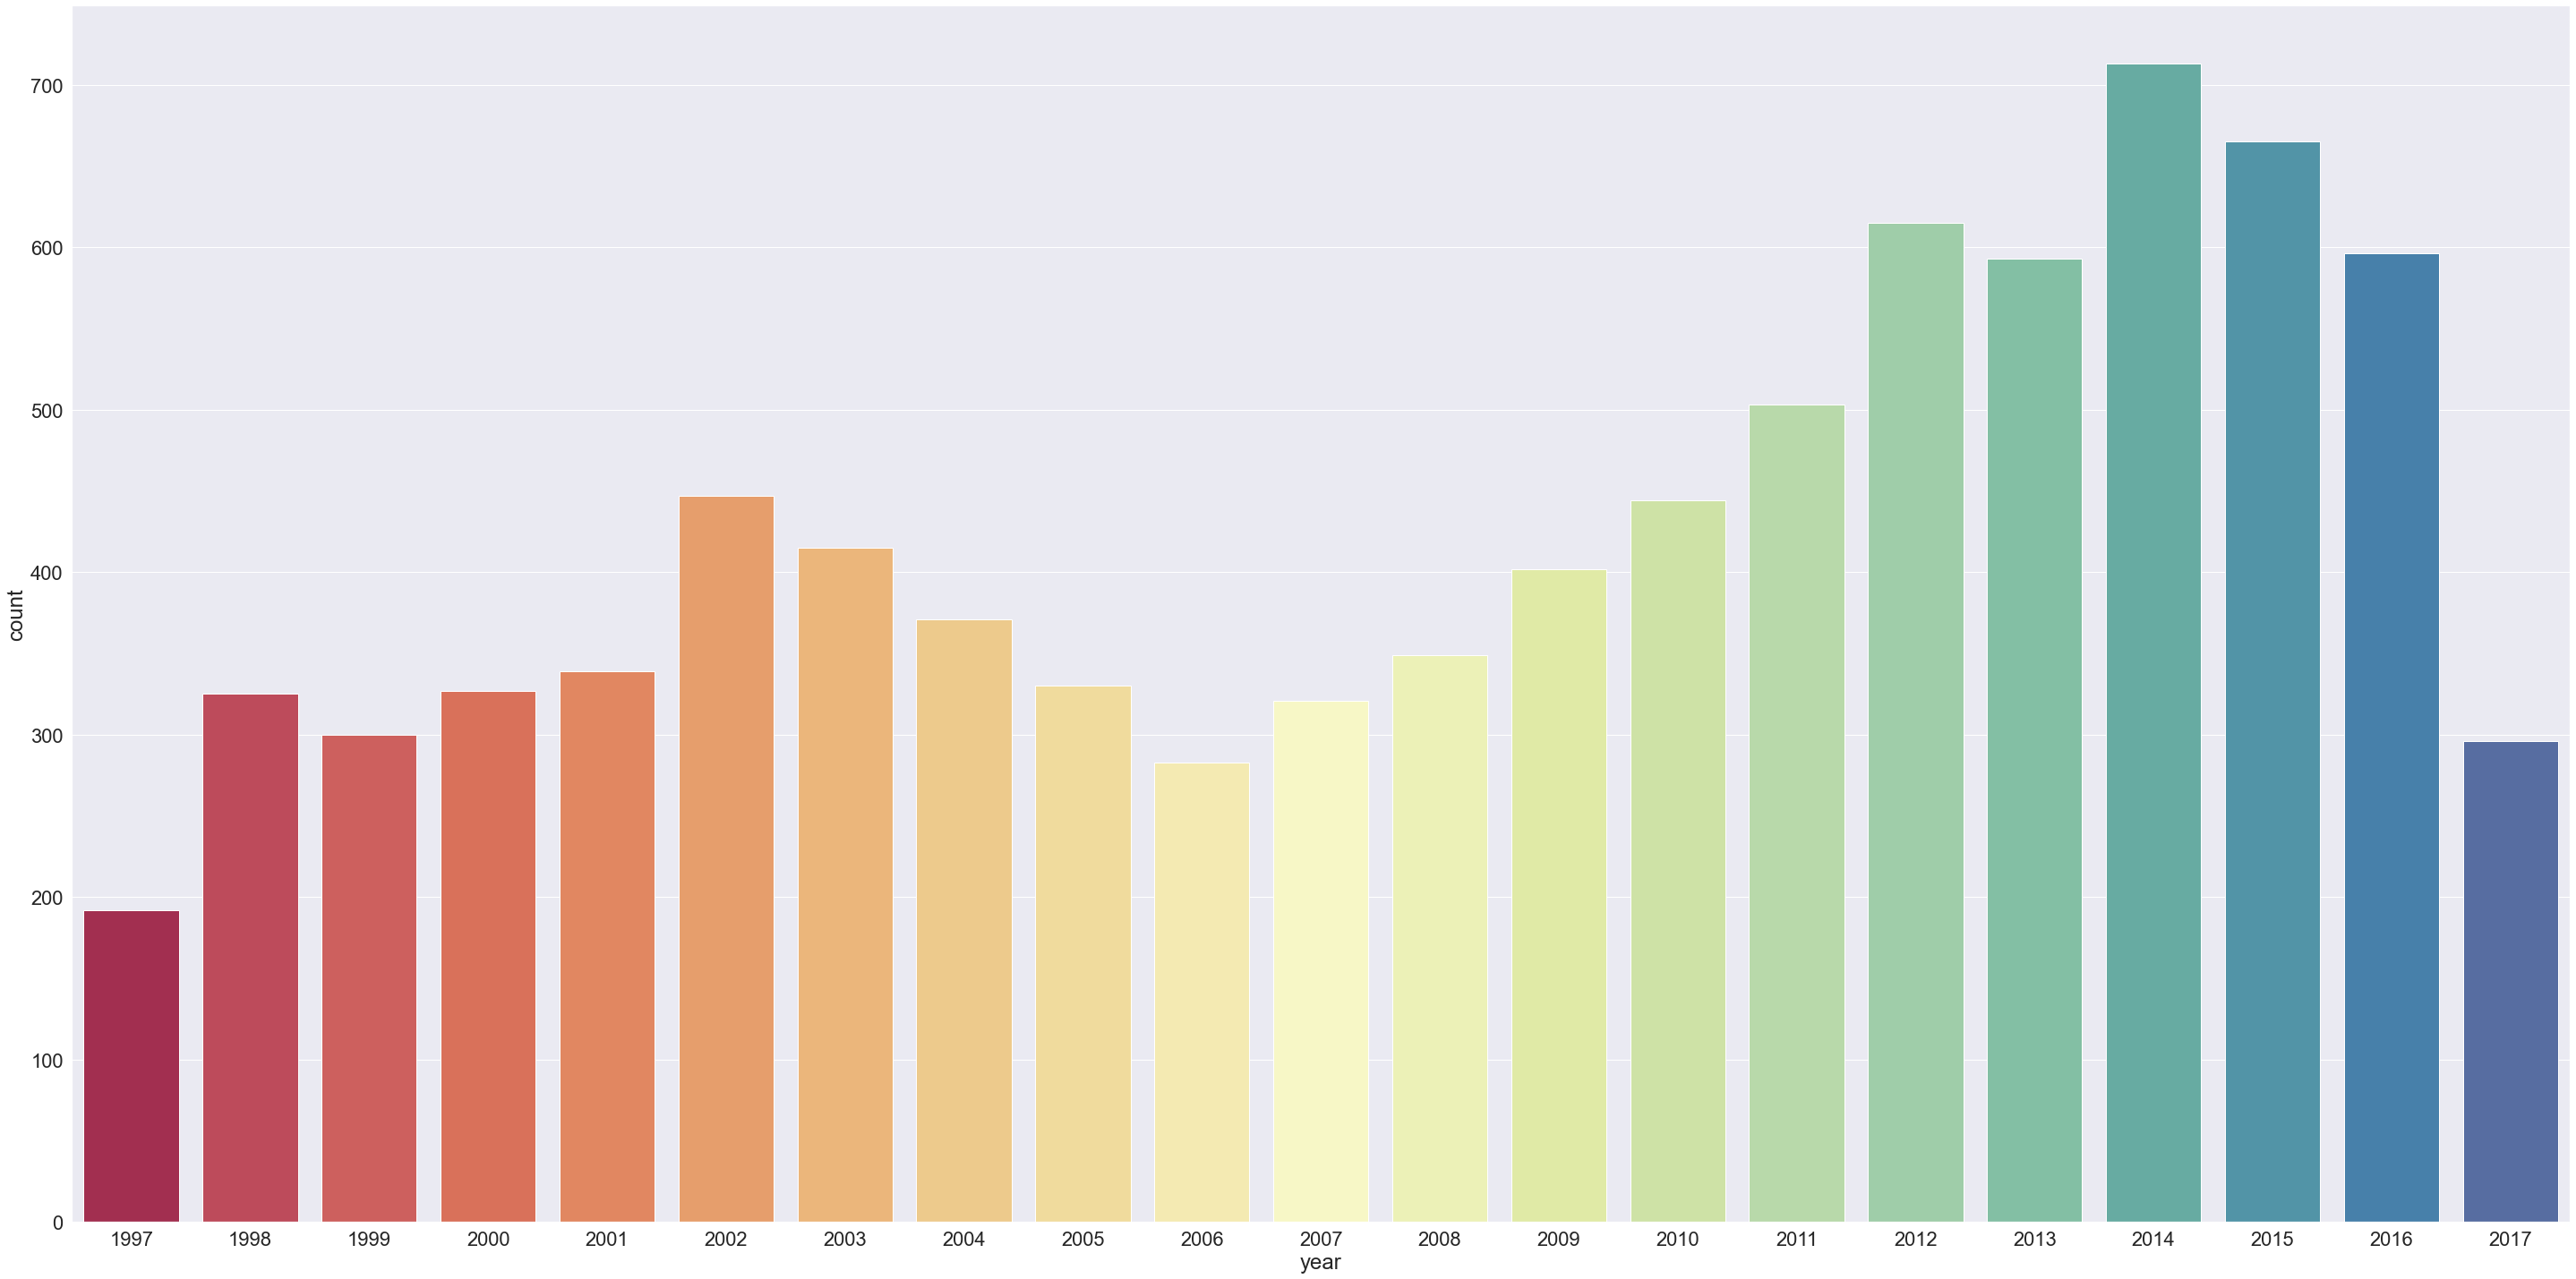

In [37]:
sns.countplot(x='year', data=df_last_10_yrs.sort_values(by='year', ascending=False), palette='Spectral')